In [3]:
%load_ext autoreload
%autoreload 2
from notebook_utils import *

import warnings
warnings.filterwarnings('ignore')

# PLOTTING
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "serif",
    'font.size':16,
    "lines.linewidth":3.0,
    "savefig.dpi":500,
    'text.latex.preamble':r'\boldmath'
})
plt.rc('axes', grid=True)
cmap=plt.cm.Spectral_r
savedir= '/private/home/sdascoli/recur/figs/'
if not os.path.exists(savedir):
    os.mkdir(savedir)

# Runs

In [4]:
runs = []
logs = []
numbers = [1632300019]
numbers = [-1]
numbers = [None]
base = '/checkpoint/pakamienny/recur/paper/nonrec'
base = '/checkpoint/sdascoli/recur/final/base'

numbers = [(base, num) for num in numbers]

NaN = np.nan
Infinity = np.nan

for (base, num) in numbers:

    if num is None: path = base
    elif num<100:
        paths = sorted(glob.glob(base+'*'), key=(lambda x : x.split('/')[-1]))
        paths=[p for p in paths if os.path.isdir(p) and p[-1].isdigit()]
        print(paths)
        path = paths[num]
    else:
        path = base+str(num)
    path += '/'
    print(path)

    dirnames = glob.glob(path+'*')
    dirnames = [p for p in dirnames if (os.path.isdir(p) and not p.endswith('__'))]
    print('{} runs found'.format(len(dirnames)))
    fails = 0
    for dirname in dirnames:
        if dirname.endswith('src'): continue
        if len(dirnames)<1000: print(dirname)
        try : 
            run = {}
            args = pickle.load(open(dirname+'/params.pkl', 'rb'))
            run['args'] = args
            run['logs'] = []
            run['num_params'] = []
            f = open(dirname+'/train.log', "r")
            for line in f.readlines():
                if '__log__' in line:
                    run['logs'].append(eval(line[line.find('{'):].rstrip('\n')))
                elif '(encoder)' in line:
                    run['num_params_enc'] = eval(line.split(' ')[-1].rstrip('\n'))
                elif '(decoder)' in line:
                    run['num_params_dec'] = eval(line.split(' ')[-1].rstrip('\n'))
            f.close()
            run['num_params'] = run['num_params_enc']+run['num_params_dec']
            args.output_dir = Path(dirname)
            runs.append(run)
        except Exception as e: 
            print(e)
            print('failed !'.format(dirname))
            fails += 1
    print('{} fails'.format(fails))
    
latest = min([len(run['logs']) for run in runs])-1
print('latest : ',latest)
params = defaultdict(list)
for run in runs:
    for k,v in vars(run['args']).items():
        params[k].append(v)
for k in params:
    try: params[k] = sorted(list(set(params[k])))
    except: pass

/checkpoint/sdascoli/recur/final/base/
4 runs found
/checkpoint/sdascoli/recur/final/base/float_sequences_True_output_numeric_True_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006
/checkpoint/sdascoli/recur/final/base/float_sequences_True_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006
/checkpoint/sdascoli/recur/final/base/float_sequences_False_output_numeric_True_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006
/checkpoint/sdascoli/recur/final/base/float_sequences_False_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006
0 fails
latest :  153


# Performance

2
float_sequences_False_output_numeric_True_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006 73308955 154 67.61
float_sequences_False_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006 68197423 284 77.64


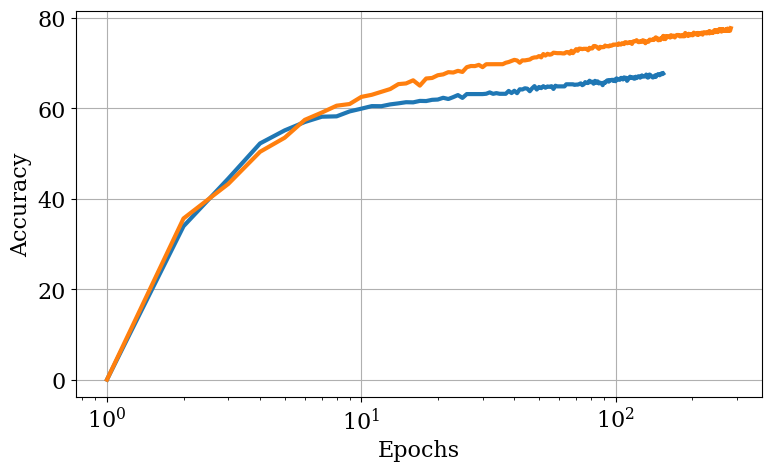

In [5]:
constraints = {
    'float_sequences':False,
    #'real_series':True,
    #'dimension':[1,2],
    #'prob_rand':0.05
    #'n_enc_layers':4,
    #'n_dec_layers':4,  
    #'prob_rand':0.0,
    #'curriculum_n_ops':False,
    #'optimizer':"adam_inverse_sqrt,lr=0.0006"
}
selected_runs, selected_params = select_runs(runs, params, constraints)
#selected_runs = selected_runs[::-1]

plt.figure(figsize=(8,5))
print(len(selected_runs))
for run in selected_runs[:]:
    args = run['args']
    #if 'warmup' not in args.optimizer: continue
    latest = len(run['logs'])
    loss       = [run['logs'][t]['valid1_recurrence_xe_loss'] for t in range(latest)]
    perfect    = [run['logs'][t]['valid1_recurrence_perfect'] for t in range(latest)]
    valid      = [run['logs'][t]['valid1_recurrence_beam_acc'] for t in range(latest)]
    additional = [run['logs'][t]['valid1_recurrence_additional_1'] for t in range(latest)]
    if valid: print(Path(args.dump_path).name, run['num_params'], latest, valid[-1])
    label = Path(args.dump_path).name
    #label = 'dim {}'.format(lab)
    plt.plot(range(1,len(valid)+1), valid, label=label)

#plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xscale('log')

plt.tight_layout()
plt.show()

67.6 & 70.3 & 73.1
77.6 & 79.1 & 80.0
79.5 & 65.9
91.1 & 75.7


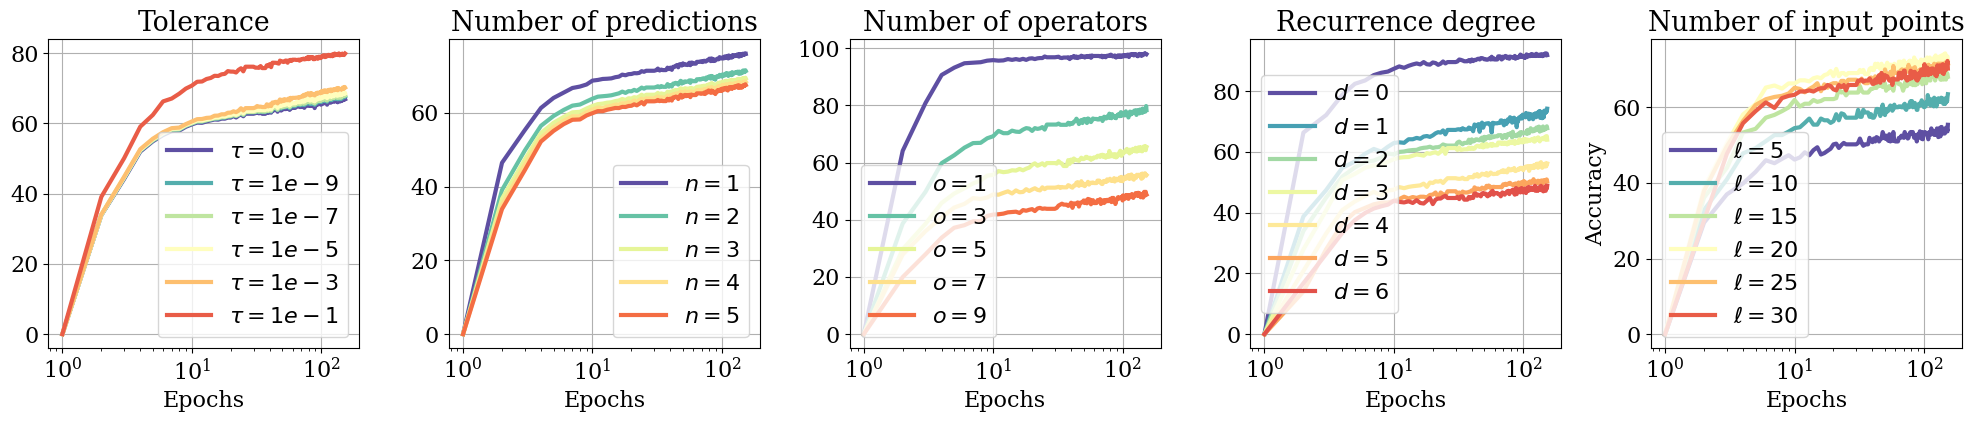

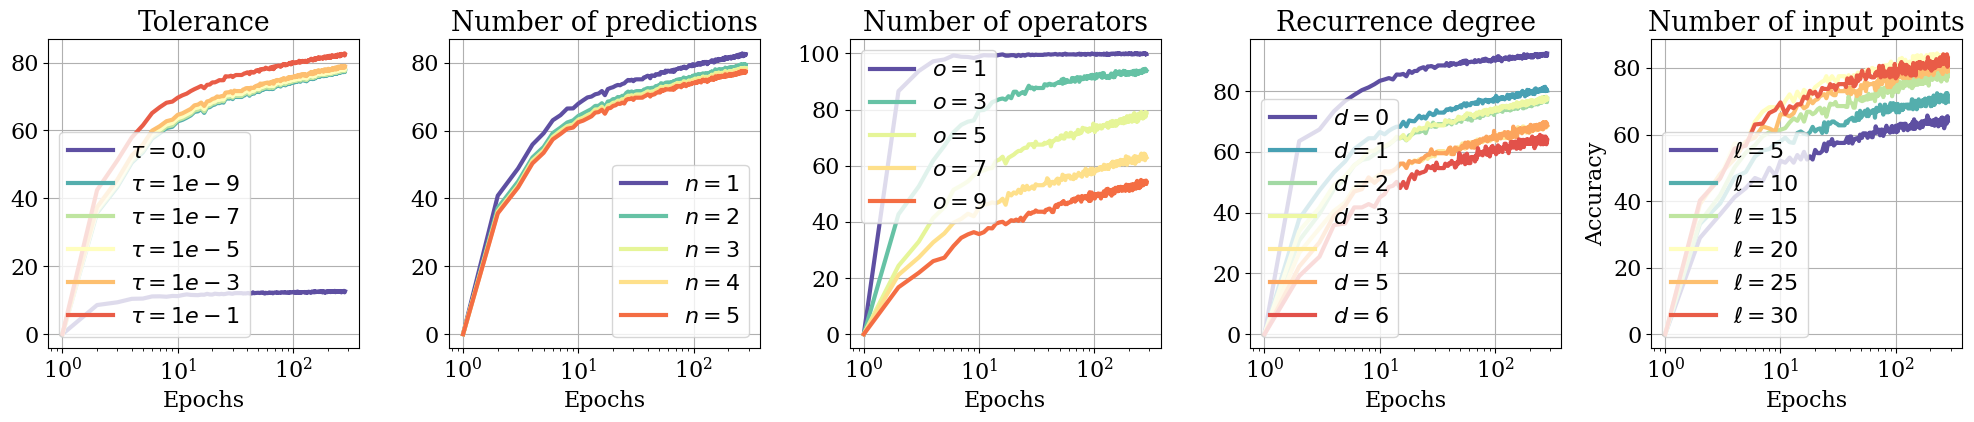

67.04
additional [67.61, 67.78, 67.93, 68.13, 68.5, 68.75, 69.3, 70.28, 73.07, 79.88]
n_predictions [76.14, 71.38, 69.44, 68.51, 67.61]
ops [98.0, 88.54166666666667, 78.43833185448092, 67.45240253853127, 65.2621722846442, 59.29752066115702, 56.37727759914255, 50.292397660818715, 48.4304932735426, 46.88279301745636]
deg [92.13263979193758, 74.07821229050279, 67.97693920335429, 64.10398230088495, 56.17416131334761, 51.29224652087475, 47.17668488160292]
points_averaged [57.154979523441085, 63.82507222124809, 66.63961835884979, 72.74034441003968, 73.50498446003547, 73.59604105571847, 75.366568914956]
12.24
additional [77.64, 77.79, 77.9, 78.09, 78.25, 78.49, 78.65, 79.07, 79.96, 82.56]
n_predictions [82.68, 79.62, 78.61, 77.98, 77.64]
ops [99.9090909090909, 98.09027777777777, 93.7888198757764, 84.95013599274705, 78.93258426966293, 71.69421487603306, 63.77277599142551, 58.36257309941521, 53.699551569506724, 53.74064837905237]
deg [92.65279583875163, 80.78212290502793, 77.41090146750524, 78.

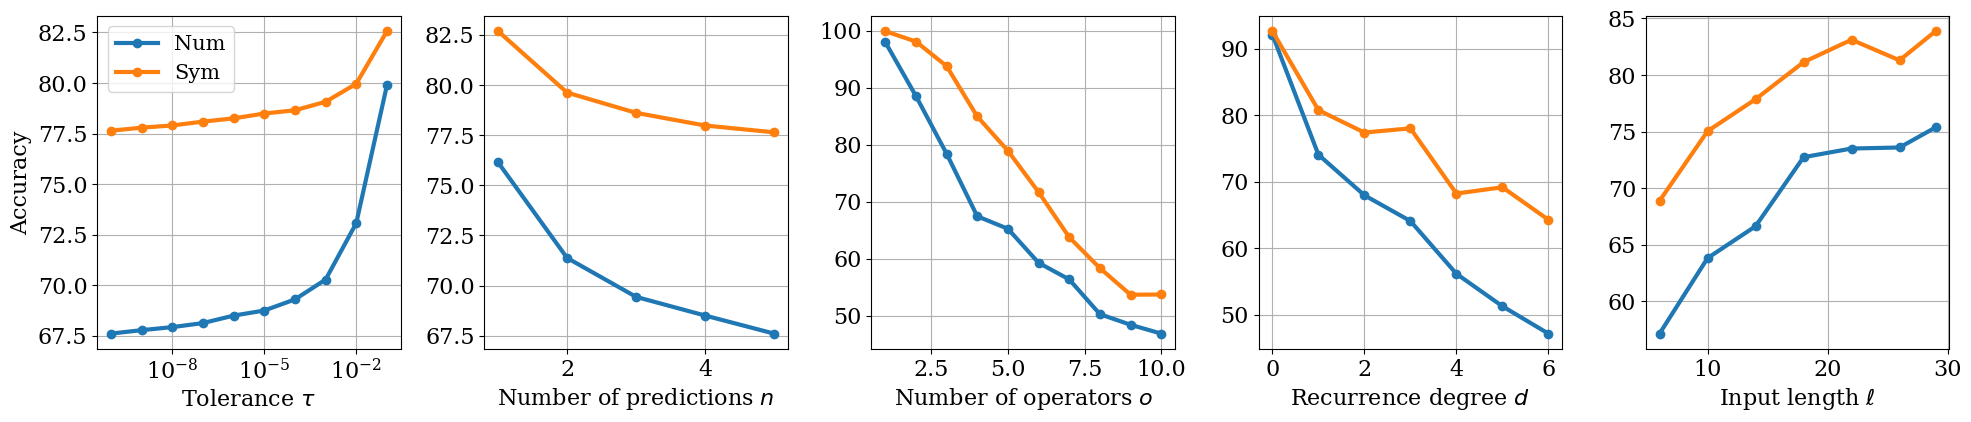

In [6]:
latest = min([len(run['logs'])-1 for run in selected_runs])
latest = -1

# chunk the inputs lens
chunk_size = 4
for run in selected_runs:
    keys = [k for k in run['logs'][0].keys() if 'points' in k]
    x = [int(k.split('_')[-1]) for k in keys]
    for length in x[::chunk_size]:
        lengths = range(length, min(max(x),length+chunk_size))
        if not lengths: continue
        keys_to_average = [f'valid1_recurrence_beam_acc_n_input_points_{l}' for l in lengths]
        average_acc =  np.mean([run['logs'][latest][k] for k in keys_to_average])
        run['logs'][latest][f'valid1_recurrence_beam_acc_n_input_points_averaged_{int(np.mean(lengths))}'] =  average_acc
        
keys = ['valid1_recurrence_additional_2', 'valid1_recurrence_additional_9', 'valid1_recurrence_additional_10']
for run in selected_runs:
    print(' & '.join(['{:.1f}'.format(run['logs'][latest][key]) for key in keys]))

key_list = [['valid1_recurrence_beam_acc_n_ops_{}'.format(i) for i in range(1,6)], ['valid1_recurrence_beam_acc_n_ops_{}'.format(i) for i in range(1,11)]]
for run in selected_runs:
    accs = []
    for keys in key_list:
        accs.append(np.mean([run['logs'][latest][key] for key in keys]))
    print(' & '.join(['{:.1f}'.format(x) for x in accs]))
        
#########
metrics = ['additional', 'n_predictions', 'ops', 'deg', 'points']
legends = ['\\tau','n','o', 'd', '\ell']
labels = ['Tolerance', 'Number of predictions', 'Number of operators', 'Recurrence degree', 'Number of input points']

for run in selected_runs:
    args = run['args']
    fig, axarr = plt.subplots(1, len(metrics), figsize=(4*len(metrics),4.5))
    for i, metric in enumerate(metrics):
        keys = [k for k in run['logs'][0].keys() if metric in k]
        keys = keys[::max(1,len(keys)//5)]
        for j, key in enumerate(keys):
            label = int(key.split('_')[-1])
            if metric == 'additional': label = args.more_tolerance.split(',')[int(label)-1]
            acc = [run['logs'][t][key] for t in range(len(run['logs'][:latest]))]
            axarr[i].plot(range(1, len(acc)+1), acc, label='${}={}$'.format(legends[i],label), color = cmap(j/len(keys)))
        axarr[i].set_title(labels[i])
        axarr[i].legend()
    for ax in axarr:
        ax.set_xscale('log')
        ax.set_xlabel('Epochs')
    #for n, ax in enumerate(axarr):
    #    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, size=20, weight='bold')
    axarr[-1].set_ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig(savedir+'acc_vs_time_{}_{}.pdf'.format('float' if args.float_sequences else 'int', 'num' if args.output_numeric else 'sym'))
    plt.show()    

##########
metrics = ['additional', 'n_predictions', 'ops', 'deg', 'points_averaged']
labels = [ 'Tolerance $\\tau$', 'Number of predictions $n$','Number of operators $o$', 'Recurrence degree $d$', 'Input length $\ell$']
        
suffix = ''
fig, axarr = plt.subplots(1, len(metrics), figsize=(4*len(metrics),4.5))
for run in selected_runs:
    args = run['args']
    run['logs'][-1]
    for i, metric in enumerate(metrics):
        if metric == 'ops':
            keys = [k for k in list(run['logs'][latest].keys())[::args.dimension] if metric in k]
        else:
            keys = [k for k in run['logs'][latest].keys() if metric in k]
        if metric == 'additional':
            keys = keys[1:]
            x = [eval(x) for x in args.more_tolerance.split(',')[1:]]
            print(run['logs'][latest]["valid1_recurrence_additional_1"])
            axarr[i].set_xscale('log')
        elif metric == 'ops':
            x = [int(k.split('_')[-1])//args.dimension for k in keys]
        #elif metric == 'points_averaged':
        #    x = [int(k.split('_')[-1])*args.dimension for k in keys]
        else:
            x = [int(k.split('_')[-1]) for k in keys]
        y = [run['logs'][latest][k] for k in keys]
        print(metric, y)
        label = 'Num' if run['args'].output_numeric else 'Sym'
        if args.prob_rand: 
            label += ' $p_{{rand}}={}$'.format(args.prob_rand)
            suffix = '_rand'
        elif args.dimension>1: 
            label += ' dim={}'.format(args.dimension)
            suffix = '_multidim'
        axarr[i].plot(x, y, label = label, marker='o')
        axarr[i].set_xlabel(r'{}'.format(labels[i]))
        #axarr[i].set_ylim(bottom=0, top=100)
        #axarr[i].set_yscale('symlog')
#for n, ax in enumerate(axarr):
#    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, size=20, weight='bold')
axarr[0].set_ylabel('Accuracy')
axarr[0].legend(fontsize=15)
plt.tight_layout()
title = 'acc_vs_difficulty_{}'.format('float' if args.float_sequences else 'int') + suffix + '.pdf'
plt.savefig(savedir+title)
plt.show()    

# Evaluate run

In [ ]:
for run in selected_runs:
    
    res = {}
    
    for group, ops in id_groups.items():
        
        args = run['args']
        new_args = copy.deepcopy(args)
        new_args.eval_size = 128
        new_args.batch_size_eval = 1000
        new_args.more_tolerance = '1e-10,0.001,0.01'
        #new_args.max_ops = 5
        #new_args.float_constants = None
        #new_args.eval_noise = 0.0
        #new_args.eval_noise_type = 'additive'
        
        new_args.extra_unary_operators = 'id'
        new_args.operators_to_remove = ','.join(set(all_ops)-set(id_groups['base']+ops))
        
        #new_args.operators_to_remove = ','.join(set(all_ops)-set(id_groups['base']))
        #new_args.extra_unary_operators = ','.join(ops)
        
        
        scores = eval_run(run, new_args)
        print(new_args.operators_to_remove, ' & '.join(['{:.1f}'.format(scores['valid1_recurrence_additional_'+str(i)]) for i in range(1,4)]))
        res[group] = scores['valid1_recurrence_additional_1']

    print(res)

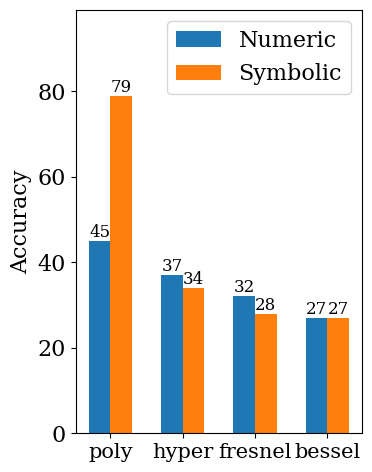

In [21]:
perfs_num = {'base': 41.40625, 'div': 33.59375, 'abs': 40.625, 'sqrt': 42.1875, 'exp': 47.65625, 'trig': 36.71875}
perfs_sym = {'base': 64.84375, 'div': 60.9375, 'abs': 62.5, 'sqrt': 64.84375, 'exp': 60.9375, 'trig': 50.0}
perfs_num = {'poly': 44.53125, 'hyper': 36.71875, 'fresnel': 32.03125, 'bessel': 26.5625}
perfs_sym = {'poly': 78.90625, 'hyper': 33.59375, 'fresnel': 28.125, 'bessel': 27.34375}


labels = perfs_num.keys()
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(4,5))
rects1 = ax.bar(x - width/2, [round(x) for x in perfs_num.values()], width, label='Numeric')
rects2 = ax.bar(x + width/2, [round(x) for x in perfs_sym.values()], width, label='Symbolic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=15)
ax.bar_label(rects1, fontsize=12, rotation=0)
ax.bar_label(rects2, fontsize=12, rotation=0)
ax.set_ylim(top=max(list(rects1.datavalues)+list(rects2.datavalues))+20)
ax.legend()
ax.grid(False)
fig.tight_layout()
plt.savefig(savedir+'acc_vs_group_{}.pdf'.format('id' if 'base' in perfs_num else 'ood'))
plt.show()

In [16]:
run = selected_runs[1]
      
for penalty in [0,1]:
    args = run['args']
    new_args = copy.deepcopy(args)
    new_args.eval_size = 10000
    new_args.batch_size_eval = 128
    new_args.more_tolerance = '1e-10,0.001,0.01'
    new_args.min_len=30
    new_args.beam_length_penalty=penalty

    scores = eval_run(run, new_args)
    print(' & '.join(['{:.1f}'.format(scores['valid1_recurrence_additional_'+str(i)]) for i in range(1,4)]))
    print(scores)

Reloading checkpoint from /checkpoint/sdascoli/recur/final/base/float_sequences_True_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006/checkpoint.pth ...
Reloading checkpoint optimizer ...
Checkpoint reloaded. Resuming at epoch 111 / iteration 520368 ...


44.7 & 53.3 & 59.8
OrderedDict([('epoch', 111), ('valid1_recurrence_xe_loss', 15.591899960756303), ('valid1_recurrence_perfect', 16.33), ('valid1_recurrence_correct', 99.88), ('valid1_recurrence_beam_acc', 44.72), ('valid1_recurrence_additional_1', 44.72), ('valid1_recurrence_additional_2', 53.28), ('valid1_recurrence_additional_3', 59.79), ('valid1_recurrence_beam_acc_n_predictions_1', 45.1), ('valid1_recurrence_beam_acc_n_predictions_2', 44.83), ('valid1_recurrence_beam_acc_n_predictions_3', 44.75), ('valid1_recurrence_beam_acc_n_predictions_4', 44.72), ('valid1_recurrence_beam_acc_n_predictions_5', 44.72), ('valid1_recurrence_beam_acc_n_input_points_30', 44.72), ('valid1_recurrence_beam_acc_n_ops_1', 99.6244131455399), ('valid1_recurrence_beam_acc_n_ops_2', 94.5748987854251), ('valid1_recurrence_beam_acc_n_ops_3', 74.5003996802558), ('valid1_recurrence_beam_acc_n_ops_4', 46.22980251346499), ('valid1_recurrence_beam_acc_n_ops_5', 27.868852459016395), ('valid1_recurrence_beam_acc_n_op

Reloading checkpoint from /checkpoint/sdascoli/recur/final/base/float_sequences_True_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006/checkpoint.pth ...
Reloading checkpoint optimizer ...
Checkpoint reloaded. Resuming at epoch 111 / iteration 520368 ...


44.7 & 53.3 & 59.8
OrderedDict([('epoch', 111), ('valid1_recurrence_xe_loss', 15.591899960756303), ('valid1_recurrence_perfect', 16.33), ('valid1_recurrence_correct', 99.88), ('valid1_recurrence_beam_acc', 44.72), ('valid1_recurrence_additional_1', 44.72), ('valid1_recurrence_additional_2', 53.28), ('valid1_recurrence_additional_3', 59.79), ('valid1_recurrence_beam_acc_n_predictions_1', 45.1), ('valid1_recurrence_beam_acc_n_predictions_2', 44.83), ('valid1_recurrence_beam_acc_n_predictions_3', 44.75), ('valid1_recurrence_beam_acc_n_predictions_4', 44.72), ('valid1_recurrence_beam_acc_n_predictions_5', 44.72), ('valid1_recurrence_beam_acc_n_input_points_30', 44.72), ('valid1_recurrence_beam_acc_n_ops_1', 99.6244131455399), ('valid1_recurrence_beam_acc_n_ops_2', 94.5748987854251), ('valid1_recurrence_beam_acc_n_ops_3', 74.5003996802558), ('valid1_recurrence_beam_acc_n_ops_4', 46.22980251346499), ('valid1_recurrence_beam_acc_n_ops_5', 27.868852459016395), ('valid1_recurrence_beam_acc_n_op

# In distribution

In [6]:
run = selected_runs[1]
env, modules, trainer, evaluator = load_run(run)
encoder, decoder = modules["encoder"], modules["decoder"]
args = run['args']

Reloading checkpoint from /checkpoint/pakamienny/recur/paper/nonrec/float_sequences_True_output_numeric_False_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0002_prob_const_0.5_prob_n_0.5/checkpoint.pth ...
Reloading checkpoint optimizer ...
Checkpoint reloaded. Resuming at epoch 114 / iteration 534432 ...


hello
hi


In [ ]:
n = 3
failure_only = False
use_sympy = False

fig, axarr = plt.subplots(n,n,figsize=(n*3,n*3))
n_errors = 0
for i in range(n):
    for j in range(n):
        while True:
            try:
                tree, pred_tree, series, preds, score = predict(args, env, modules, gen_kwargs={'nb_ops':2, 'length':25})
                if args.prob_rand and "rand" not in tree.prefix(): continue
                print(i,j)
                if np.isnan(np.sum(series)) or np.isnan(np.sum(preds)): continue
                ending = np.array(series[-5:]); gaps = abs(ending[1:]-ending[:-1])
                if len(set(gaps))<2: continue # discard uninteresting series                            
                if failure_only is None: pass
                elif failure_only:
                    if abs((series[-1]-preds[-1])/series[-1])<0.1: continue
                else: 
                    if abs((series[-1]-preds[-1])/series[-1])>1e-2: continue

                confidence = 10**score
                if use_sympy: 
                    pred, true = sympy_infix(pred_tree), sympy_infix(tree)
                else:
                    pred, true = readable_infix(pred_tree), readable_infix(tree)
                #axarr[i,j].plot(series)
                #axarr[i,j].plot(preds, ls='--')
                length = len(series)//args.dimension
                axarr[i,j].axvspan(0, length//2, alpha=0.1, color='green')
                axarr[i,j].axvspan(length//2, len(series)//args.dimension, alpha=0.1, color='red')
                for dim in range(args.dimension):
                    axarr[i,j].plot(range(length), series[dim::args.dimension], color='C%d'%dim, lw=2, label='True' if dim==0 else '')
                    axarr[i,j].plot(range(length//2, length), preds[dim::args.dimension][length//2:], color='C%d'%dim, lw=8, alpha=.5, label='Pred' if dim==0 else '')
                break
            except Exception as e:
                print(e, end=' ')
                #if n_errors>1000: break
                n_errors += 1
        axarr[i,j].set_title(f'True: {true}\nPred: {pred}\nConfidence: {confidence:.2}', fontsize=10)
        #axarr[i,j].set_yscale('symlog')
        #axarr[i,j].set_xticks([])
        axarr[i,j].set_yticks([])    
axarr[-1,-1].legend(fontsize=12)
        
plt.tight_layout()
title = 'failure' if failure_only else 'success'
title += '_{}'.format('float' if args.float_sequences else 'int', args.dimension)
if args.prob_rand: 
    title += '_rand'
elif args.dimension>1: 
    suffix += '_multidim'
title += '.pdf'
plt.savefig(savedir+title)
plt.show()

# Out of distribution

In [28]:
run = selected_runs[-1]
env, modules, trainer, evaluator = load_run(run)
encoder, decoder = modules["encoder"], modules["decoder"]
args = run['args']

Reloading checkpoint from /checkpoint/sdascoli/recur/final/random/float_sequences_True_output_numeric_False_dimension_1_prob_rand_0.1_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006,warmup_updates=10000/checkpoint.pth ...
Reloading checkpoint optimizer ...
Checkpoint reloaded. Resuming at epoch 67 / iteration 314096 ...


(tan(n) * w)
(w * tan(n))
(tan(n) / (w / sin(n)))
(tan(n) * w)
-21.5145051928499 -21.786024254571196
-0.012620279169215215


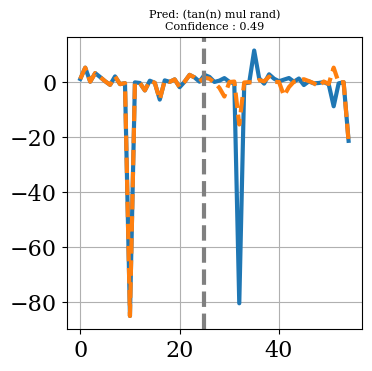

In [41]:
from scipy.special import erf, factorial
f = lambda n : scipy.special.dawsn(n)
f = lambda n : np.arctanh(1/(n+1))
f = lambda n : np.tan(n)*np.random.normal()
#f = lambda n : scipy.special.dawsn(n)
# np.exp(np.pi*np.sqrt(2*n/3))/(4*n*np.sqrt(3))
length = 25
pred_len = 30

fig, ax = plt.subplots(1,1,figsize=(4,4))
series = [f(n) for n in range(1,length+pred_len+1)]
#series = [logistic(n, 3, 0.5) for n in range(length)]

tree, pred, _, preds, score = predict(args, env, modules, series=series[:length], beam_length_penalty=None, beam_size=3, verbose=True, pred_len=pred_len)
print(readable_infix(pred))
print(series[-1],preds[-1])
print((series[-1] - preds[-1])/series[-1])
confidence = 10**score
#pred = readable_infix(pred)
ax.plot(series)
ax.plot(preds, ls='--')
#ax.plot([n * np.log(n) for n in range(1,length+1)], ls='--')
ax.axvline(x=length, ls='--', color='grey')
plt.title(f'Pred: {pred}\nConfidence : {confidence:.2f}', fontsize=8)
#plt.yscale('symlog')
#plt.xticks([])
#plt.yticks([])

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


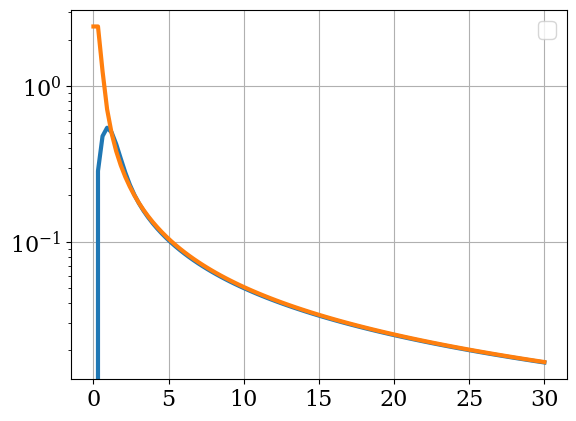

In [19]:
x = np.linspace(0,30, 100)
#plt.plot(x, np.arccosh(x))
#plt.plot(x, np.log(2*x-1/(x**1.5)))
#plt.semilogy(x, np.cosh(x))
#plt.semilogy(x, 1/np.sin(2/np.exp(x)))
plt.semilogy(x, scipy.special.dawsn(x))
plt.semilogy(x, 1/((x + abs((x - ((np.pi - 1) / (np.sqrt(n) * n)))))))
#for op in od_groups['fresnel']:
#    if op=='fresnel': continue
#    plt.plot(x, getattr(scipy.special, op)(x), label=op)
plt.legend()
plt.show()

# Embeddings

Reloading checkpoint from /checkpoint/sdascoli/recur/final/base/float_sequences_False_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006/checkpoint.pth ...
Reloading checkpoint optimizer ...
Checkpoint reloaded. Resuming at epoch 246 / iteration 1153248 ...


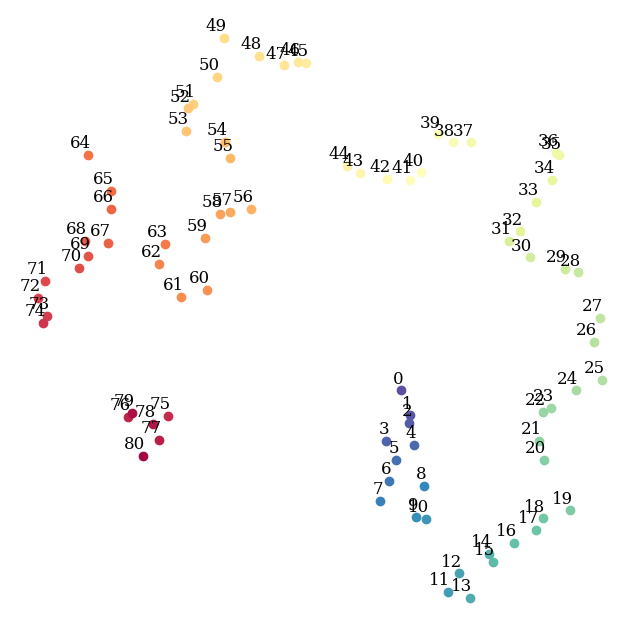

In [8]:
run = selected_runs[1]
env, modules, trainer, evaluator = load_run(run)
encoder, decoder = modules["encoder"], modules["decoder"]
args = run['args']

def get_labels_tokens(embeddings, env):
    "Creates and TSNE model and plots it"
    labels = []; tokens = []
    if args.float_sequences: smallest, largest = -50,50
    else: smallest, largest = 0, 80
    for number in range(smallest, largest+1):
        if args.float_sequences: word = 'E'+str(number-args.float_precision-1)
        else: word = str(number)
        idx = env.input_word2id[word]
        tokens.append(embeddings[idx])
        labels.append(str(number))
    return labels, tokens

def get_output_labels_tokens(embeddings, env):
    "Creates and TSNE model and plots it"
    labels = []; tokens = []
    for word, idx in env.output_word2id.items():
        tokens.append(embeddings[idx])
        labels.append(word)
    return labels, tokens
            
def tsne_plot_2d(embeddings, env, n_words=500):
    
    labels, tokens = get_labels_tokens(embeddings, env) 
    tsne_model = TSNE( n_components=2, perplexity=40, init='pca', n_iter=1000, random_state=0)
    new_values = tsne_model.fit_transform(tokens)

    x = []; y = []
    for value in new_values:
        x.append(value[0]); y.append(value[1])
        
    plt.figure(figsize=(8, 8)) 
    for i in range(len(x))[:n_words]:
        plt.scatter(x[i],y[i], color=cmap(i/min(n_words, len(x))))
        plt.annotate(labels[i], xy=(x[i], y[i]), fontsize=12, xytext=(2, 2), textcoords='offset points', ha='right', va='bottom')
    plt.axis(False)
    plt.savefig(savedir+'embeddings_{}_{}.pdf'.format('float' if args.float_sequences else 'int', 'num' if args.output_numeric else 'sym'))
    plt.show()
       
tsne_plot_2d(encoder.embeddings.weight.cpu().detach().numpy(), env)

<Figure size 1500x1500 with 0 Axes>

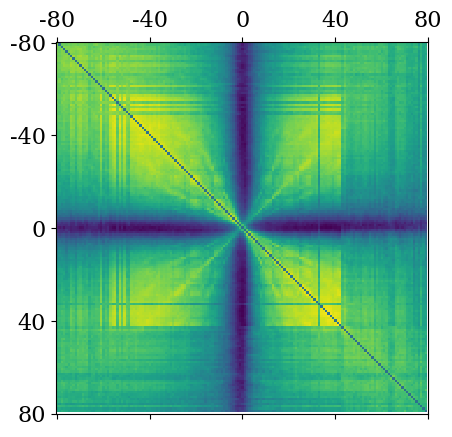

In [74]:
plt.figure(figsize=(15,15))
embeddings = encoder.embeddings.weight.cpu().detach()
if args.float_sequences: smallest, largest = -80, 80
else: smallest, largest = 0, 80
similarity = torch.zeros(largest-smallest, largest-smallest)

for i1, w1 in enumerate(range(smallest, largest)):
    if args.float_sequences: w1 = 'E'+str(w1-args.float_precision)
    for i2, w2 in enumerate(range(smallest, largest)):
        if i1==i2: continue
        if args.float_sequences: w2 = 'E'+str(w2-args.float_precision)
        j1 = env.input_word2id[str(w1)]
        j2 = env.input_word2id[str(w2)]
        similarity[i1,i2] = torch.dot(embeddings[j1], embeddings[j2])/embeddings[j1].norm()/embeddings[j2].norm()

plt.matshow(similarity)
plt.grid(False)

nticks = 5
ticks = np.linspace(0,len(similarity), nticks)
labels = np.linspace(smallest, largest, nticks).astype(int)
plt.xticks(ticks, labels)
plt.yticks(ticks, labels)

plt.tight_layout()
plt.savefig(savedir+'embedding_similarities_{}_{}.pdf'.format('float' if args.float_sequences else 'int', 'num' if args.output_numeric else 'sym'))
plt.show()

# OEIS

In [10]:
from oeis import load_oeis
lines, ids = load_oeis(length=30, path="/private/home/sdascoli/recur/OEIS.txt")

run = selected_runs[1]
env, modules, trainer, evaluator = load_run(run)
encoder, decoder = modules["encoder"], modules["decoder"]
args = run['args']

199619 30.0


Reloading checkpoint from /checkpoint/sdascoli/recur/final/base/float_sequences_False_output_numeric_False_dimension_1_prob_rand_0.0_batch_size_64_optimizer_adam_inverse_sqrt,lr=0.0006/checkpoint.pth ...
Reloading checkpoint optimizer ...
Checkpoint reloaded. Resuming at epoch 260 / iteration 1218880 ...
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3371f1b440>
Traceback (most recent call last):
  File "/private/home/sdascoli/.conda/envs/bert/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/private/home/sdascoli/.conda/envs/bert/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1297, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/private/home/sdascoli/.conda/envs/bert/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/private/home/sdascoli/.conda/envs/bert/lib/python3.7/multiproc

In [11]:
batch_size = 64
max_preds = 10

print('{:.0f} batches'.format(len(lines)/batch_size))
corrects = {k:0 for k in [1,max_preds]}
tol1     = {k:0 for k in [1,max_preds]}
tol2     = {k:0 for k in [1,max_preds]}
for ibatch, batch in enumerate(chunks(lines, batch_size)):
    inputs = [seq[:-max_preds] for seq in batch]
    preds, pred_series = predict_batch(args, env, modules, inputs, pred_len=max_preds)
    for i in range(len(pred_series)): 
        pred = pred_series[i]
        seq_len = len(batch[i])
        if pred is None: continue
        true = batch[i][-max_preds:]
        #print(true, pred)
        for key in corrects:
            try: 
                max_error = max([abs(float(x-y)/float(y+1e-10)) for x,y in zip(true[:key], pred[:key])])
            except Exception as e: print(e); continue
            corrects[key] += int(max_error<1e-10)
            tol1[key] += int(max_error<0.001)
            tol2[key] += int(max_error<0.01)
        
    if ibatch%10==0: 
        total = (ibatch+1)*batch_size
        print('batch {}: '.format(ibatch),
              ' '.join(['{}: {:.1f}'.format(k, 100*corrects[k]/total) for k in corrects]),
              #' '.join(['{}: {:.1f}'.format(k, 100*tol1[k]/total) for k in tol1]),
              ' '.join(['{}: {:.1f}'.format(k, 100*tol2[k]/total) for k in tol2]))

3119 batches
int too large to convert to float
batch 0:  1: 26.6 10: 18.8 1: 32.8 10: 20.3
batch 10:  1: 21.4 10: 15.1 1: 25.6 10: 15.6
batch 20:  1: 18.1 10: 10.9 1: 22.2 10: 11.9
batch 30:  1: 18.4 10: 9.7 1: 22.7 10: 10.6
batch 40:  1: 18.2 10: 8.8 1: 23.3 10: 10.4
int too large to convert to float
batch 50:  1: 17.3 10: 8.1 1: 22.5 10: 10.0
batch 60:  1: 16.1 10: 7.3 1: 21.5 10: 9.0
batch 70:  1: 16.9 10: 7.8 1: 22.2 10: 9.3
batch 80:  1: 18.6 10: 9.1 1: 23.3 10: 10.6
int too large to convert to float
batch 90:  1: 18.5 10: 8.5 1: 22.7 10: 9.8
int too large to convert to float
batch 100:  1: 19.8 10: 8.5 1: 24.0 10: 9.8
batch 110:  1: 22.1 10: 10.1 1: 26.0 10: 11.3
batch 120:  1: 23.4 10: 10.5 1: 27.1 10: 11.6
batch 130:  1: 23.7 10: 11.1 1: 27.3 10: 12.2
batch 140:  1: 22.9 10: 10.5 1: 26.4 10: 11.7
batch 150:  1: 22.2 10: 10.3 1: 25.7 10: 11.4
batch 160:  1: 22.6 10: 10.8 1: 25.8 10: 11.9
int too large to convert to float
batch 170:  1: 22.4 10: 10.9 1: 25.6 10: 11.9
batch 180:  

7 A000034  1, 2, 1, 2, 1, 2, 1, 2, 1, 2 (3 sub x_0_1)


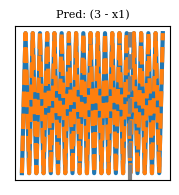

8 A000035  0, 1, 0, 1, 0, 1, 0, 1, 0, 1 (sign(n) sub (x_0_1 mod n))


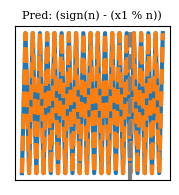

63 A000689  1, 2, 4, 8, 6, 2, 4, 8, 6, 2 ((x_0_1 add x_0_1) mod 10)


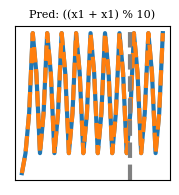

79 A000855  1, 2, 4, 8, 16, 32, 64, 28, 56, 12 ((x_0_1 add x_0_1) mod (10)**2)


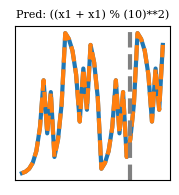

82 A000931  1, 0, 0, 1, 0, 1, 1, 1, 2, 2 (x_0_3 add x_0_2)


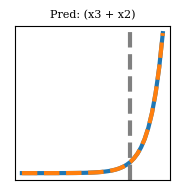

90 A001057  0, 1, -1, 2, -2, 3, -3, 4, -4, 5 (x_0_2 sub sign(x_0_1))


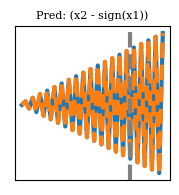

99 A001148  1, 3, 9, 7, 1, 3, 9, 7, 1, 3 (10 sub x_0_2)


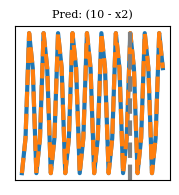

146 A001607  0, 1, -1, -1, 3, -1, -5, 7, 3, -17 ((x_0_2 mul -2) sub x_0_1)


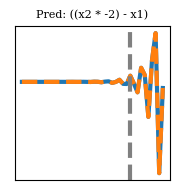

147 A001608  3, 0, 2, 3, 2, 5, 5, 7, 10, 12 (x_0_3 add x_0_2)


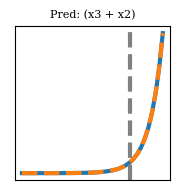

150 A001634  0, 2, 3, 6, 5, 11, 14, 22, 30, 47 ((x_0_3 add x_0_2) add x_0_4)


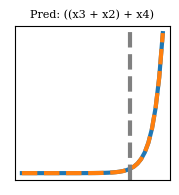

154 A001687  0, 1, 0, 1, 0, 1, 1, 1, 2, 1 (x_0_5 add x_0_2)


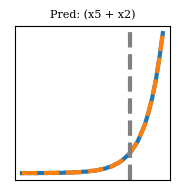

173 A001903  1, 7, 9, 3, 1, 7, 9, 3, 1, 7 (10 sub x_0_2)


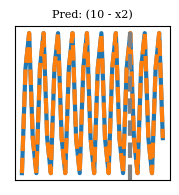

329 A004442  1, 0, 3, 2, 5, 4, 7, 6, 9, 8 (x_0_2 add 2)


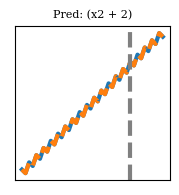

330 A004443  2, 3, 0, 1, 6, 7, 4, 5, 10, 11 ((n sub x_0_2) add (-4 add n))


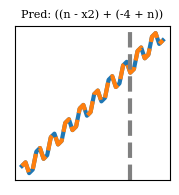

331 A004444  3, 2, 1, 0, 7, 6, 5, 4, 11, 10 (n sub (((n add n) mod -8) add 4))


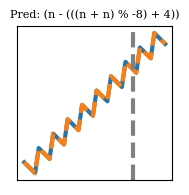

353 A004482  1, 2, 0, 4, 5, 3, 7, 8, 6, 10 (x_0_3 add 3)


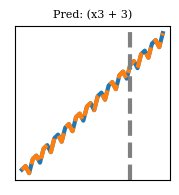

354 A004483  2, 0, 1, 5, 3, 4, 8, 6, 7, 11 (x_0_3 add 3)


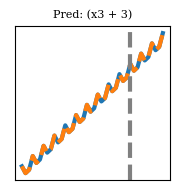

493 A006369  0, 1, 3, 2, 5, 7, 4, 9, 11, 6 (x_0_3 add (sign((n mod (x_0_3 mod 2))) add 3))


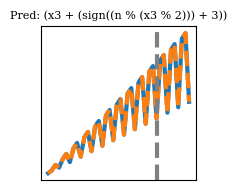

537 A007387  0, 2, 3, 2, 5, 2, 7, 2, 9, 7 (x_0_2 add (x_0_5 mod ((x_0_1 sub n))**2))


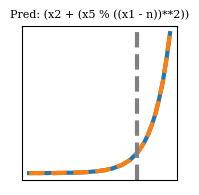

577 A007877  0, 1, 2, 1, 0, 1, 2, 1, 0, 1 abs(((n mod 4) sub sign(n)))


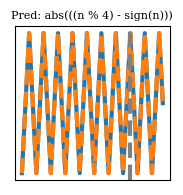

579 A007891  1, 4, 1, 4, 9, 4, 9, 16, 9, 16 ((((n mod 3) add n) idiv -3))**2


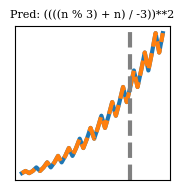

580 A007892  1, 4, 9, 1, 4, 9, 16, 4, 9, 16 ((n sub ((n idiv 4) mul 3)))**2


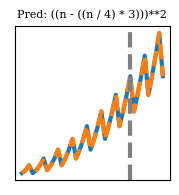

581 A007893  1, 4, 9, 16, 1, 4, 9, 16, 25, 4 ((((n idiv 5) mul -4) add n))**2


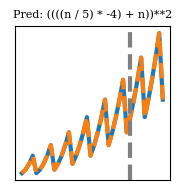

683 A008346  1, 0, 2, 1, 4, 4, 9, 12, 22, 33 ((x_0_3 add x_0_2) add x_0_2)


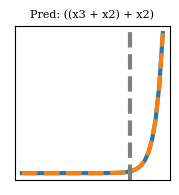

742 A008611  1, 0, 1, 2, 1, 2, 3, 2, 3, 4 (x_0_3 add sign(n))


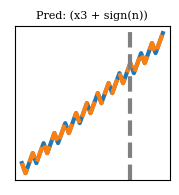

743 A008612  1, 0, 0, 1, 1, 0, 2, 1, 1, 2 (x_0_2 sub sign((n mod -3)))


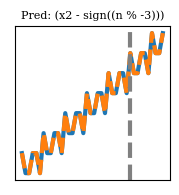

746 A008615  0, 0, 1, 0, 1, 1, 1, 1, 2, 1 ((n idiv 3) sub x_0_1)


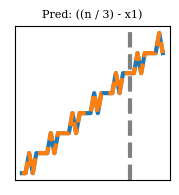

747 A008616  1, 0, 1, 0, 1, 1, 1, 1, 1, 1 (abs((n idiv -5)) sub x_0_1)


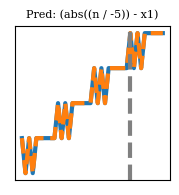

753 A008624  1, 0, 1, 1, 2, 1, 2, 2, 3, 2 ((n idiv 4) sub (n mod -2))


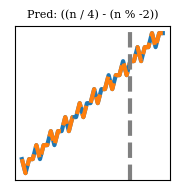

822 A008797  1, 0, 2, 0, 4, 1, 6, 2, 9, 4 (abs(((n)**2 idiv -8)) sub x_0_1)


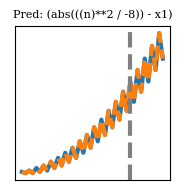

858 A008954  0, 1, 3, 6, 0, 5, 1, 8, 6, 5 (((n add x_0_1) add -1) mod 10)


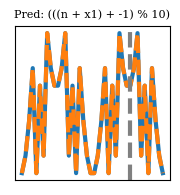

860 A008959  0, 1, 4, 9, 6, 5, 6, 9, 4, 1 (((n sub sign(n)))**2 mod 10)


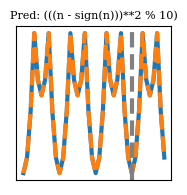

865 A009116  1, -1, 0, 2, -4, 4, 0, -8, 16, -16 ((x_0_1 add x_0_2) mul -2)


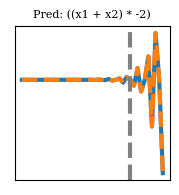

868 A009545  0, 1, 2, 2, 0, -4, -8, -8, 0, 16 ((x_0_1 sub x_0_2) mul 2)


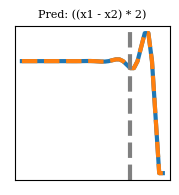

912 A010052  1, 1, 0, 0, 1, 0, 0, 0, 0, 1 step(sign(((-10 mod n) mod -9)))


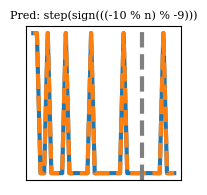

919 A010121  2, 1, 1, 1, 4, 1, 1, 1, 4, 1 (((n add x_0_2))**2 mod 8)


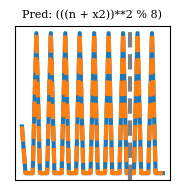

931 A010673  0, 2, 0, 2, 0, 2, 0, 2, 0, 2 (x_0_2 mod n)


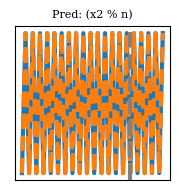

932 A010674  0, 3, 0, 3, 0, 3, 0, 3, 0, 3 abs(x_0_2)


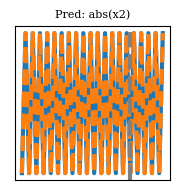

933 A010678  0, 7, 0, 7, 0, 7, 0, 7, 0, 7 step(x_0_2)


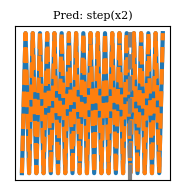

934 A010679  0, 8, 0, 8, 0, 8, 0, 8, 0, 8 step(x_0_2)


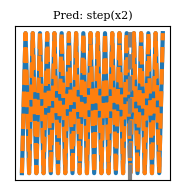

935 A010681  0, 10, 0, 10, 0, 10, 0, 10, 0, 10 step(x_0_2)


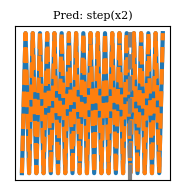

936 A010684  1, 3, 1, 3, 1, 3, 1, 3, 1, 3 (3 idiv x_0_1)


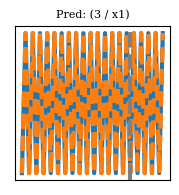

937 A010685  1, 4, 1, 4, 1, 4, 1, 4, 1, 4 (4 idiv x_0_1)


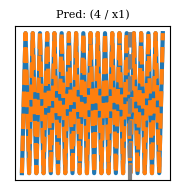

938 A010686  1, 5, 1, 5, 1, 5, 1, 5, 1, 5 (5 idiv x_0_1)


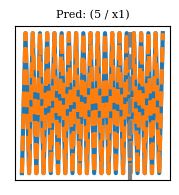

939 A010687  1, 6, 1, 6, 1, 6, 1, 6, 1, 6 (6 idiv x_0_1)


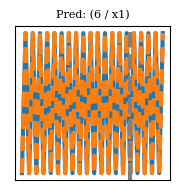

940 A010689  1, 8, 1, 8, 1, 8, 1, 8, 1, 8 (8 idiv x_0_1)


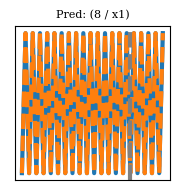

941 A010690  1, 9, 1, 9, 1, 9, 1, 9, 1, 9 abs(x_0_2)


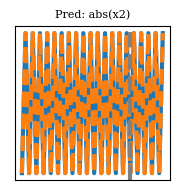

942 A010691  1, 10, 1, 10, 1, 10, 1, 10, 1, 10 (10 idiv x_0_1)


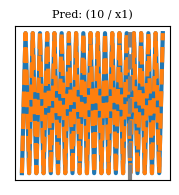

944 A010693  2, 3, 2, 3, 2, 3, 2, 3, 2, 3 (x_0_2 sub (n mod n))


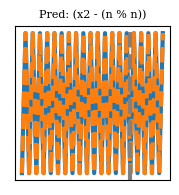

945 A010694  2, 4, 2, 4, 2, 4, 2, 4, 2, 4 (6 sub x_0_1)


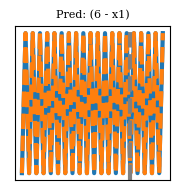

946 A010695  2, 5, 2, 5, 2, 5, 2, 5, 2, 5 abs((x_0_1 sub 7))


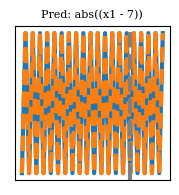

947 A010696  2, 6, 2, 6, 2, 6, 2, 6, 2, 6 abs(x_0_2)


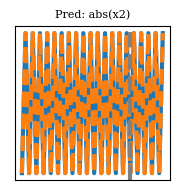

948 A010697  2, 7, 2, 7, 2, 7, 2, 7, 2, 7 abs(x_0_2)


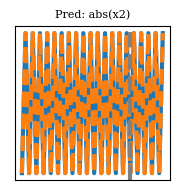

949 A010698  2, 8, 2, 8, 2, 8, 2, 8, 2, 8 abs(x_0_2)


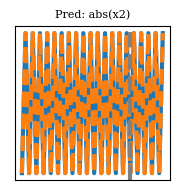

950 A010699  2, 9, 2, 9, 2, 9, 2, 9, 2, 9 step(x_0_2)


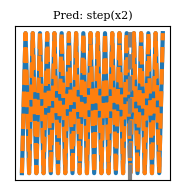

952 A010702  3, 4, 3, 4, 3, 4, 3, 4, 3, 4 abs(x_0_2)


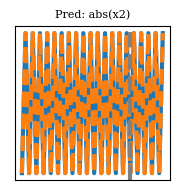

953 A010703  3, 5, 3, 5, 3, 5, 3, 5, 3, 5 abs(x_0_2)


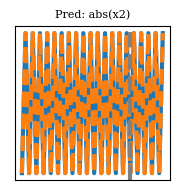

954 A010705  3, 7, 3, 7, 3, 7, 3, 7, 3, 7 abs(x_0_2)


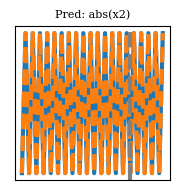

955 A010706  3, 8, 3, 8, 3, 8, 3, 8, 3, 8 abs(x_0_2)


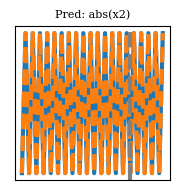

956 A010707  3, 9, 3, 9, 3, 9, 3, 9, 3, 9 step(x_0_2)


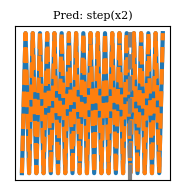

958 A010710  4, 5, 4, 5, 4, 5, 4, 5, 4, 5 abs(x_0_2)


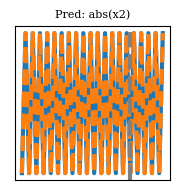

959 A010711  4, 6, 4, 6, 4, 6, 4, 6, 4, 6 abs(x_0_2)


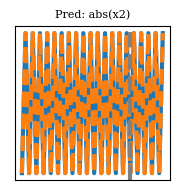

960 A010712  4, 7, 4, 7, 4, 7, 4, 7, 4, 7 abs(x_0_2)


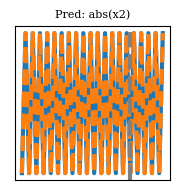

961 A010713  4, 8, 4, 8, 4, 8, 4, 8, 4, 8 abs(x_0_2)


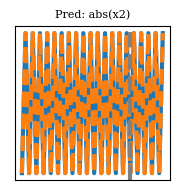

963 A010717  5, 6, 5, 6, 5, 6, 5, 6, 5, 6 abs(x_0_2)


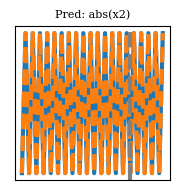

964 A010718  5, 7, 5, 7, 5, 7, 5, 7, 5, 7 abs(x_0_2)


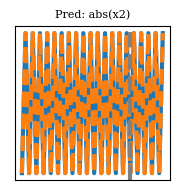

965 A010719  5, 8, 5, 8, 5, 8, 5, 8, 5, 8 step(x_0_2)


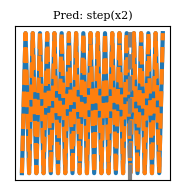

966 A010720  5, 9, 5, 9, 5, 9, 5, 9, 5, 9 step(x_0_2)


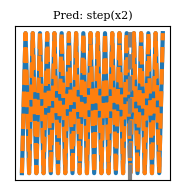

967 A010721  5, 10, 5, 10, 5, 10, 5, 10, 5, 10 step(x_0_2)


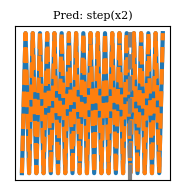

969 A010724  6, 8, 6, 8, 6, 8, 6, 8, 6, 8 abs(x_0_2)


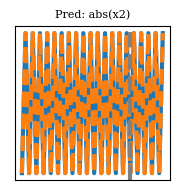

970 A010725  6, 9, 6, 9, 6, 9, 6, 9, 6, 9 step(x_0_2)


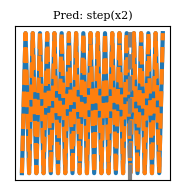

971 A010726  6, 10, 6, 10, 6, 10, 6, 10, 6, 10 step(x_0_2)


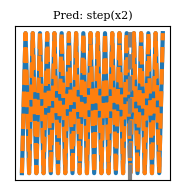

973 A010730  7, 10, 7, 10, 7, 10, 7, 10, 7, 10 step(x_0_2)


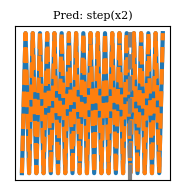

975 A010732  8, 9, 8, 9, 8, 9, 8, 9, 8, 9 abs(x_0_2)


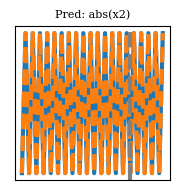

1011 A010872  0, 1, 2, 0, 1, 2, 0, 1, 2, 0 ((n add sign((n idiv (n idiv (n mul abs(n)))))) mod 3)


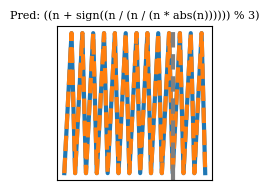

1012 A010873  0, 1, 2, 3, 0, 1, 2, 3, 0, 1 ((n add -1) mod 4)


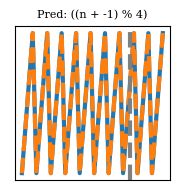

1013 A010874  0, 1, 2, 3, 4, 0, 1, 2, 3, 4 ((n add 4) mod 5)


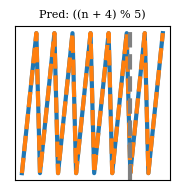

1014 A010875  0, 1, 2, 3, 4, 5, 0, 1, 2, 3 ((n add 5) mod 6)


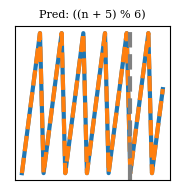

1015 A010876  0, 1, 2, 3, 4, 5, 6, 0, 1, 2 ((n sub sign(n)) mod 7)


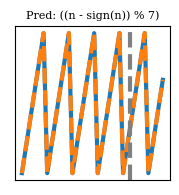

1016 A010877  0, 1, 2, 3, 4, 5, 6, 7, 0, 1 ((n sub sign(n)) mod 8)


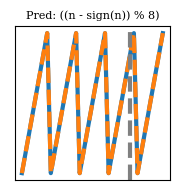

1017 A010878  0, 1, 2, 3, 4, 5, 6, 7, 8, 0 ((n sub sign(n)) mod 9)


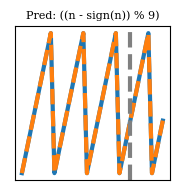

1018 A010879  0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ((n sub sign(n)) mod 10)


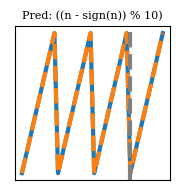

1019 A010880  0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ((n sub sign(n)) mod (10 add sign(n)))


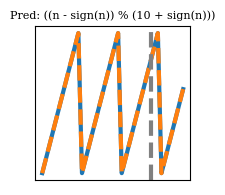

1020 A010881  0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ((n add -1) mod (abs(abs(abs(-2))) add 10))


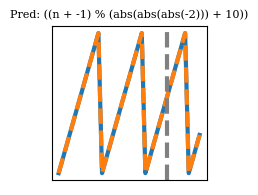

1021 A010882  1, 2, 3, 1, 2, 3, 1, 2, 3, 1 ((n mod -3) add 3)


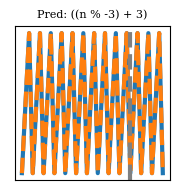

1022 A010883  1, 2, 3, 4, 1, 2, 3, 4, 1, 2 ((n mod -4) add 4)


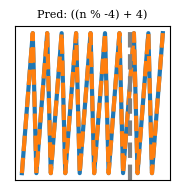

1023 A010884  1, 2, 3, 4, 5, 1, 2, 3, 4, 5 ((n mod -5) add 5)


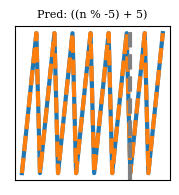

1024 A010885  1, 2, 3, 4, 5, 6, 1, 2, 3, 4 ((n mod -6) add 6)


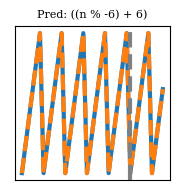

1025 A010886  1, 2, 3, 4, 5, 6, 7, 1, 2, 3 ((n mod -7) add 7)


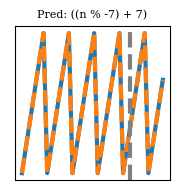

1026 A010887  1, 2, 3, 4, 5, 6, 7, 8, 1, 2 ((n mod -8) add 8)


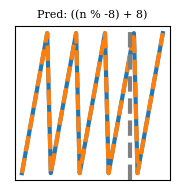

1027 A010888  0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ((x_0_1 mod 9) add sign(n))


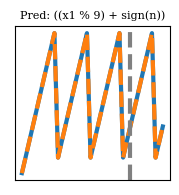

1028 A010889  1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ((n mod -10) add 10)


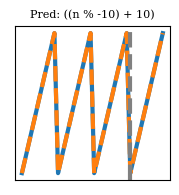

1030 A010892  1, 1, 0, -1, -1, 0, 1, 1, 0, -1 (x_0_1 sub x_0_2)


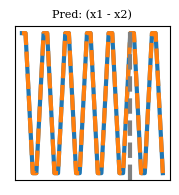

1034 A011558  0, 1, 1, 1, 1, 0, 1, 1, 1, 1 ((((n add sign((n sub (n)**2))))**2)**2 mod 5)


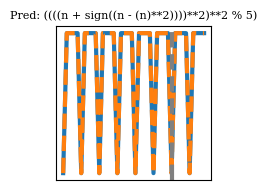

1036 A011655  0, 1, 1, 0, 1, 1, 0, 1, 1, 0 (((n sub sign(n)))**2 mod 3)


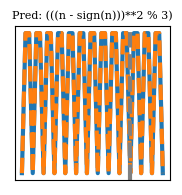

1037 A011656  0, 0, 1, 0, 1, 1, 1, 0, 0, 1 (((x_0_2 sub x_0_3))**2 mod n)


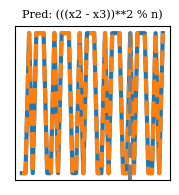

1038 A011657  0, 0, 1, 1, 1, 0, 1, 0, 0, 1 abs((x_0_1 sub x_0_3))


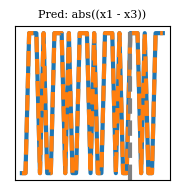

1043 A011765  0, 0, 0, 1, 0, 0, 0, 1, 0, 0 step(sign((n mod -4)))


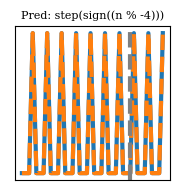

1107 A012245  1, 1, 0, 0, 0, 1, 0, 0, 0, 0 step(sign(((n)**2 mod (-6 sub n))))


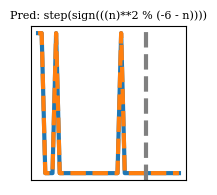

1136 A014017  1, 0, 0, 0, -1, 0, 0, 0, 1, 0 ((n mod n) sub x_0_4)


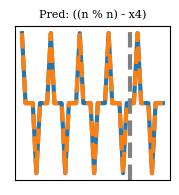

1138 A014019  1, 1, 0, 0, 0, -1, -1, 0, 0, 0 ((n mod n) sub x_0_5)


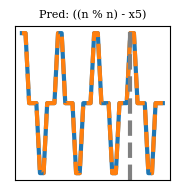

1140 A014021  1, 0, 1, 0, 0, 0, -1, 0, -1, 0 (x_0_2 sub x_0_4)


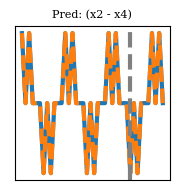

1171 A014107  0, -1, 2, 9, 20, 35, 54, 77, 104, 135 ((n add (n add -5)) mul (n sub sign(n)))


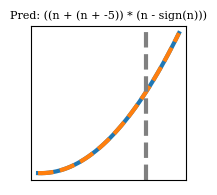

1184 A014391  1, 8, 4, 2, 6, 8, 4, 2, 6, 8 ((x_0_1 mul 8) mod 10)


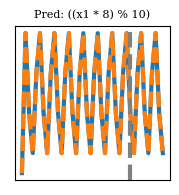

KeyboardInterrupt: 

In [50]:
def is_monotonic(seq):
    seq = np.array(seq)
    diff = seq[1:]-seq[:-1]
    if all(diff>=0) or all(diff<=0): return True
    else: return False

max_preds = 10
n_correct = 0
plot = True

for i, seq in enumerate(lines):
    #if i==100: break
    if is_monotonic(seq): continue
    input_seq = seq[:-max_preds]
    _, pred, _, pred_seq, score = predict(args, env, modules, series=input_seq, pred_len=max_preds)
    if seq[-max_preds:] != pred_seq[-max_preds:]: continue
    n_correct += 1
    print(i, ids[i], ', '.join(str(x) for x in input_seq[:10]), pred)
    #print(seq[-max_preds:], pred_seq[-max_preds:])
    pred = readable_infix(pred)
    
    if plot:
        plt.figure(figsize=(2,2))
        plt.plot(seq)
        plt.plot(pred_seq, ls='--')
        plt.axvline(x=len(input_seq), ls='--', color='grey')
        plt.title(f'Pred: {pred}', fontsize=8)
        plt.xticks([])
        plt.yticks([])
        plt.show()

# Attention maps

In [ ]:
run = selected_runs[1]
env, modules, trainer, evaluator = load_run(run)
args = run['args']
    
tree, pred_tree, series, preds, score = plot_attention(args, env, modules)

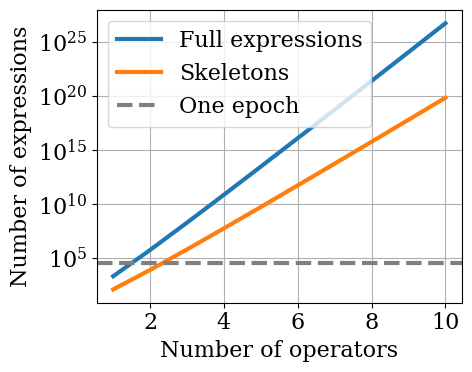

+03 & +05 & +08 & +10 & +13 & +16 & +18 & +21 & +24 & +26
+03 & +05 & +08 & +10 & +13 & +16 & +18 & +21 & +23 & +26


In [3]:
def num_trees(L, p1, p2, n):
    if n==0: return L
    elif n==1: return p2*(L*L+1)/2 + p1*L
    else: return (1/(n+1)) * ((p1+2*L*p2)*(2*n-1)*num_trees(L, p1, p2, n-1) - p1*(n-2)*num_trees(L, p1, p2, n-2))
    #else: return ((p1 + 2*L*p2)*(2*n-1)*num_trees(p1, p2, L, n-1) − p1*(n−2)*num_trees(p1, p2, L, n-2)) / (n+1)
num_trees(1, 0, 1, 5)

num_int = []
num_float = []
num_int_skeleton = []
num_float_skeleton = []
nops = range(1,11)
for nop in nops:
    num_int_skeleton.append(num_trees(6, 4, 5, nop))
    num_float_skeleton.append(num_trees(6, 12, 4, nop))
    num_int.append(num_trees(27, 4, 5, nop))
    num_float.append(num_trees(31, 12, 4, nop))
    
plt.figure(figsize=(5,4))
plt.semilogy(nops, num_int, label='Full expressions')
#plt.semilogy(nops, num_float)
plt.semilogy(nops, num_int_skeleton, label='Skeletons')
#plt.semilogy(nops, num_float_skeleton)
plt.axhline(y=3e5*1/10, color='grey',ls='--', label='One epoch')
plt.xlabel('Number of operators')
plt.ylabel('Number of expressions')
plt.legend()
plt.tight_layout()
plt.savefig(savedir+'num_expressions.pdf')
plt.show()
print(' & '.join(['{:e}'.format(_).split('e')[-1] for _ in num_int]))
print(' & '.join(['{:e}'.format(_).split('e')[-1] for _ in num_float]))